# Criação do MVP_4. Irei fazer alterações para usar a normalização.

Nesse estudo usaremos o Aprendizado Não Supervisonado, pois não temos o dado de saída. 

A ideia é usar a Clusterização (agrupamento) para indicar as localidades com maior número de ocorrências recentes (2000 - 2023) de terremotos.


## Carga do Dataset Earthquake

In [1]:
# Importando dados de um arquivo .csv no Google Drive

# importações de libs necessárias
import pandas as pd
from google.colab import drive

# monta o drive
drive.mount("/content/drive")

Mounted at /content/drive


In [207]:
# Dataset de registros de ocorrência de terremotos entre 1/1/2001 e 1/1/2023, fonte: https://www.kaggle.com/datasets/warcoder/earthquake-dataset

# carga do dataset earthquake através de um arquivo csv localizado no google drive
earthquake = pd.read_csv("drive/My Drive/Pos_Graduacao/Analise_Dados/Datasets/earth225_MVP.csv", encoding='unicode_escape')
# precisei usar um complemento no código (encoding='unicode_escape'), pois estava dando erro na importação do arquivo csv.

# verifica o tipo de earthquake
print(type(earthquake))

<class 'pandas.core.frame.DataFrame'>


## Análise Exploratória de Dados do dataset earthquake

In [208]:
# Iportação de outras libs necessárias para análise e geração de gráficos
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from pandas.core.frame import Axis
import missingno as ms
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


In [209]:
# instalação do basemap
! pip install basemap
! pip install cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [210]:
# Iportação de outras libs necessárias para geração de gráficos
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import cartopy.mpl.geoaxes as geoaxes

## Informações Gerais e Estatística Descritiva

In [211]:
# criação de um dataframe para fazer o tratamento dos valores não coerentes
df_earth = pd.DataFrame(earthquake)

In [212]:
# mostra as dimensões do dataset earthquake (instâncias e atributos)
df_earth.shape

(774, 17)

In [213]:
# exibindo os nomes das colunas
df_earth.columns

Index(['title', 'magnitude', 'date', 'time', 'cdi', 'mmi', 'alert', 'tsunami',
       'sig', 'dmin', 'gap', 'depth', 'latitude', 'longitude', 'location',
       'continent', 'country'],
      dtype='object')

In [214]:
# Descrição dos atributos do dataset:

# Magnitude - Magnitude (força) do terremoto;
# Data - Dia do evento;
# CDI - A intensidade máxima relatada para o intervalo do evento;
# MMI - A intensidade instrumental máxima estimada para o evento;
# Alert - Nível do alerta, verde, amarelo, laranja e vermelho;
# Tsumani - 1 para ocorrências no mar e 0 para ocorrências em outras localidades;
# SIG - número que descreve a importância do evento. Números maiores indicam um evento mais significativo.
# Esse valor é determinado por vários fatores, incluindo: magnitude, MMI máximo, relatórios de feltro e impacto estimado;
# DMIN - Distância horizontal do epicentro até a estação mais próxima;
# GAP - O maior intervalo azimutal entre estações adjacentes azimutalmente (em graus); 
# Em geral, quanto menor esse número, mais confiável é a posição horizontal calculada do terremoto; 
# Locais de terremotos nos quais a lacuna azimutal excede 180 graus geralmente apresentam grandes incertezas de localização e profundidade;
# DEPTH - A profundidade onde o terremoto começa a se formar;
# Latitude/Longitude - Coordedanadas geográficas do local do terremoto;
# Continent - Continente de ocorrência do evento;
# Country - Cidade de ocorrência (proximidade) do evento.

In [215]:
# exibindo a quantidade de linhas por coluna (indica se há algum dado faltando no dataset)
df_earth.count()

title        774
magnitude    774
date         774
time         774
cdi          774
mmi          774
alert        774
tsunami      774
sig          774
dmin         774
gap          774
depth        774
latitude     774
longitude    774
location     774
continent    774
country      774
dtype: int64

In [216]:
# mostra as informações do dataset earthquake (informações sobre o tipo de dados dos atributos)
df_earth.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      774 non-null    object 
 1   magnitude  774 non-null    float64
 2   date       774 non-null    object 
 3   time       774 non-null    object 
 4   cdi        774 non-null    int64  
 5   mmi        774 non-null    int64  
 6   alert      774 non-null    object 
 7   tsunami    774 non-null    int64  
 8   sig        774 non-null    int64  
 9   dmin       774 non-null    float64
 10  gap        774 non-null    float64
 11  depth      774 non-null    float64
 12  latitude   774 non-null    float64
 13  longitude  774 non-null    float64
 14  location   774 non-null    object 
 15  continent  774 non-null    object 
 16  country    774 non-null    object 
dtypes: float64(6), int64(4), object(7)
memory usage: 102.9+ KB


In [217]:
# Exibi as 10 primeiras linhas do dataset
df_earth.head(10)

,title,magnitude,date,time,cdi,mmi,alert,tsunami,sig,dmin,gap,depth,latitude,longitude,location,continent,country
0,M 7.0,7.0,22/11/2022,2:03:00 AM,8,7,green,1,768,0.509,17.0,14.000,-9.7963,159.5960,"Malango, Solomon Islands",Oceania,Solomon Islands
1,M 6.9,6.9,18/11/2022,1:37:00 PM,4,4,green,0,735,2.229,34.0,25.000,-4.9559,100.7380,"Bengkulu, Indonesia",Asia,Indonesia
2,M 7.3,7.3,11/11/2022,10:48:00 AM,5,5,green,1,833,1.865,21.0,37.000,-19.2918,-172.1290,"Neiafu, Tonga",Oceania,Tonga
3,M 7.0,7.0,9/11/2022,9:51:00 AM,4,3,green,1,755,4.578,26.0,660.000,-26.0442,178.3810,the Fiji Islands,Oceania,Fiji
4,M 6.8,6.8,9/11/2022,9:38:00 AM,1,3,green,1,711,4.678,22.0,630.379,-25.9678,178.3630,the Fiji Islands,Oceania,Fiji
5,M 6.7,6.7,20/10/2022,11:57:00 AM,7,6,green,1,797,1.151,37.0,20.000,7.6712,-82.3396,"Boca Chica, Panama",Central America,Panama
6,M 6.8,6.8,22/09/2022,6:16:00 AM,8,7,yellow,1,1179,2.137,92.0,20.000,18.3300,-102.9130,"Aguililla, Mexico",North America,Mexico
7,M 7.6,7.6,19/09/2022,6:05:00 PM,9,8,yellow,1,1799,1.153,69.0,26.943,18.3667,-103.2520,"Aguililla, Mexico",North America,Mexico
8,M 6.9,6.9,18/09/2022,6:44:00 AM,9,9,yellow,1,887,0.401,34.0,10.000,23.1444,121.3070,"Yujing, Taiwan",Asia,Taiwan
9,M 6.5,6.5,17/09/2022,1:41:00 PM,7,7,green,1,756,0.430,54.0,10.000,23.0290,121.3480,"Lugu, Taiwan",Asia,Taiwan


In [218]:
# Exibi as 10 últimas linhas do dataset
df_earth.tail(10)

,title,magnitude,date,time,cdi,mmi,alert,tsunami,sig,dmin,gap,depth,latitude,longitude,location,continent,country
764,M 7.1,7.1,3/7/2020,7:35:00 AM,0,7,green,0,776,0.0,0.0,35.0,1.2710,126.249,"Ternate, Indonesia",Asia,Indonesia
765,M 7.4,7.4,15/05/2020,11:04:00 AM,0,6,green,0,842,0.0,0.0,36.0,-4.6800,102.562,"Bengkulu, Indonesia",Asia,Indonesia
766,M 6.6,6.6,12/5/2020,10:41:00 AM,0,8,green,0,670,0.0,0.0,10.0,13.6710,-88.938,"Cojutepeque, El Salvador",Central America,El Salvador
767,M 7.7,7.7,6/5/2020,1:53:00 AM,0,9,green,0,912,0.0,0.0,16.0,23.4190,70.232,"Bhach?u, India",Asia,India
768,M 6.9,6.9,2/5/2020,12:51:00 PM,0,6,green,0,732,0.0,0.0,28.0,-4.0220,101.776,"Bengkulu, Indonesia",Asia,Indonesia
769,M 7.7,7.7,31/03/2020,11:53:00 PM,0,8,green,0,912,0.0,0.0,60.0,13.0490,-88.660,"Puerto El Triunfo, El Salvador",Central America,El Salvador
770,M 6.9,6.9,25/03/2020,2:50:00 AM,5,7,green,0,745,0.0,0.0,36.4,56.7744,-153.281,"Old Harbor, Alaska",North America,United States of America
771,M 7.1,7.1,13/02/2020,10:34:00 AM,0,7,green,0,776,0.0,0.0,103.0,-14.9280,167.170,"Port-Olry, Vanuatu",Oceania,Vanuatu
772,M 6.8,6.8,28/01/2020,7:11:00 PM,0,5,green,0,711,0.0,0.0,33.0,6.6310,126.899,"Mindanao, Philippines",Asia,Philippines
773,M 7.5,7.5,24/01/2020,5:56:00 PM,0,7,green,0,865,0.0,0.0,33.0,6.8980,126.579,"Lukatan, Philippines",Asia,Philippines


In [219]:
# verificando nulls no dataset (indica quantidade de valores ausentes em cada atributo do dataset)
df_earth.isnull().sum()

title        0
magnitude    0
date         0
time         0
cdi          0
mmi          0
alert        0
tsunami      0
sig          0
dmin         0
gap          0
depth        0
latitude     0
longitude    0
location     0
continent    0
country      0
dtype: int64

### Não vou remover os atributos latitude e longitude do dataset pois vou usá-los em alguns gráficos.

In [220]:
# Mostra um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
df_earth.drop(['latitude', 'longitude'], axis=1).describe()

,magnitude,cdi,mmi,tsunami,sig,dmin,gap,depth
count,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000
mean,6.942713,4.354005,5.981912,0.383721,871.527132,1.283585,25.030349,74.481276
std,0.447178,3.171469,1.450229,0.486606,323.726425,2.130507,24.329198,134.746838
min,6.500000,0.000000,1.000000,0.000000,650.000000,0.000000,0.000000,2.700000
25%,6.600000,0.000000,5.000000,0.000000,691.000000,0.000000,14.200000,14.112500
50%,6.800000,5.000000,6.000000,0.000000,754.000000,0.000000,20.000000,26.295000
75%,7.100000,7.000000,7.000000,1.000000,911.500000,1.812500,29.975000,48.750000
max,9.100000,9.000000,9.000000,1.000000,2910.000000,17.654000,239.000000,670.810000


In [221]:
# correlação de Pearson
df_earth.drop(['latitude', 'longitude'], axis=1).corr(method='pearson')

<ipython-input-221-9fbda3a8d2ea>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_earth.drop(['latitude', 'longitude'], axis=1).corr(method='pearson')


,magnitude,cdi,mmi,tsunami,sig,dmin,gap,depth
magnitude,1.000000,0.207846,0.286811,-0.002888,0.515075,-0.085572,-0.110730,0.033884
cdi,0.207846,1.000000,0.313604,0.170051,0.478581,0.018539,0.097595,-0.092081
mmi,0.286811,0.313604,1.000000,-0.136807,0.443289,-0.285498,-0.016822,-0.494509
tsunami,-0.002888,0.170051,-0.136807,1.000000,-0.011880,0.415149,0.117544,0.044127
sig,0.515075,0.478581,0.443289,-0.011880,1.000000,-0.089489,0.114405,-0.085861
dmin,-0.085572,0.018539,-0.285498,0.415149,-0.089489,1.000000,-0.022221,0.167772
gap,-0.110730,0.097595,-0.016822,0.117544,0.114405,-0.022221,1.000000,-0.112612
depth,0.033884,-0.092081,-0.494509,0.044127,-0.085861,0.167772,-0.112612,1.000000


In [222]:
# Verifica a distribuição das classes
### Escrever algo sobre esse resultado
df_earth.groupby('magnitude').size()

magnitude
6.50    130
6.60    113
6.70     98
6.80     78
6.90     73
7.00     48
7.10     43
7.20     30
7.30     31
7.40     18
7.50     22
7.60     22
7.70     16
7.80     15
7.90      9
8.00      5
8.10      6
8.16      1
8.20      6
8.30      3
8.40      2
8.60      2
8.80      1
9.10      2
dtype: int64

In [223]:
# Verifica a distribuição de classes dos continentes atingidas 
df_earth.groupby('continent').size()

continent
Africa               5
Asia               296
Central America     35
Europe              19
North America       80
Oceania            246
South America       93
dtype: int64

In [224]:
# Verifica a distribuição das classes
### Escrever algo sobre esse resultado
# CDI - A intensidade máxima relatada para o intervalo do evento;
##### corrigir os valores 0, pois eles não fazem sentido
df_earth.groupby('cdi').size()

cdi
0    209
1     14
2     13
3     45
4     61
5    107
6     77
7     96
8     86
9     66
dtype: int64

In [225]:
# Verifica a distribuição das classes
### Escrever algo sobre esse resultado
# MMI - A intensidade instrumental máxima estimada para o evento;
df_earth.groupby('mmi').size()

mmi
1      1
2      3
3     37
4     87
5    140
6    202
7    208
8     68
9     28
dtype: int64

In [226]:
# Verifica a distribuição das classes
### Escrever algo sobre esse resultado
# MMI - A intensidade instrumental máxima estimada para o evento;
##### alterar os valores maiores que 180 para a média ou mediana ou moda, pois valores acima de 180 não 
##### não são confiáveis
df_earth.groupby('gap').size()

gap
0.0      70
8.0       1
8.7       1
9.0       7
9.5       2
         ..
208.8     1
210.0     1
220.0     1
229.0     1
239.0     1
Length: 256, dtype: int64

In [227]:
# Verifica a distribuição das classes
# Quanto maior o valor, mais significativo é o terremoto
df_earth.groupby('sig').size()

sig
650     50
651     10
652      6
653      5
654      3
        ..
2504     1
2790     1
2820     1
2840     1
2910     2
Length: 338, dtype: int64

In [228]:
# Verifica a distribuição das classes
df_earth.groupby('depth').size()

depth
2.700      1
4.200      2
5.000      3
5.810      1
6.000      1
          ..
630.000    1
630.379    1
660.000    1
664.000    1
670.810    1
Length: 300, dtype: int64

In [229]:
# Verifica a distribuição das classes
###### Achar uma forma de trabalhar com esse atributo, pois ele pode ser bastante útil
df_earth.groupby('alert').size()

alert
green     616
orange     28
red        13
yellow    117
dtype: int64

In [230]:
# removendo atributos do dataset que não serão usados.
del df_earth["title"]

In [231]:
# removendo atributos do dataset que não serão usados.
del df_earth["time"]

In [232]:
# Selecionando os valores de GAP maiores que 180 graus, pois eles precisam ser tratados, pois valores maiores que 180 graus
# apresentam grandes incertezas de localização e profundidade.

df_earth[df_earth['gap'] > 180]

,magnitude,date,cdi,mmi,alert,tsunami,sig,dmin,gap,depth,latitude,longitude,location,continent,country
30,6.5,11/1/2022,0,3,green,1,650,0.0000,208.8,37.000,52.5020,-168.080,"Nikolski, Alaska",North America,United States of America
33,6.7,11/1/2022,0,4,green,1,691,0.0000,205.2,33.000,52.4800,-167.736,"Nikolski, Alaska",North America,United States of America
168,6.9,4/5/2018,7,8,yellow,1,1392,0.1100,210.0,5.810,19.3182,-155.000,"Leilani Estates, Hawaii",Oceania,United States of America
351,6.8,10/3/2014,5,5,green,1,1211,0.6568,229.0,16.441,40.8287,-125.134,"Indianola, California",North America,United States of America
499,7.2,4/4/2010,9,9,red,0,2910,0.5137,239.0,9.987,32.2862,-115.295,"Delta, B.C., MX",North America,Mexico
512,6.5,10/1/2010,7,7,yellow,0,1360,0.3225,220.0,28.737,40.6520,-124.692,"Ferndale, California",North America,United States of America


In [233]:
# removendo os valores de GAP maiores que 180 graus pelo index
df_earth = df_earth.drop(index=df_earth[df_earth['gap'] > 180].index)

In [234]:
# verificando se os valores foram removidos
df_earth[df_earth['gap'] > 180]

,magnitude,date,cdi,mmi,alert,tsunami,sig,dmin,gap,depth,latitude,longitude,location,continent,country


## Tratamento dos valores não coerentes no dataframe

In [235]:
# trabalhar os valores 0 do dataset como mostrado na aula 3 de análise e fazer o tratamento  de missings  OK!!!!
# voltar com os valores de 0 para o gap  e tsunami (somente a principio) OK!!!!
# para o restante usar a mediana ou a moda, ver qual vai ficar melhor.

In [236]:
# substituindo os zeros por NaN
df_earth.replace(0, np.nan, inplace=True)

<Axes: >

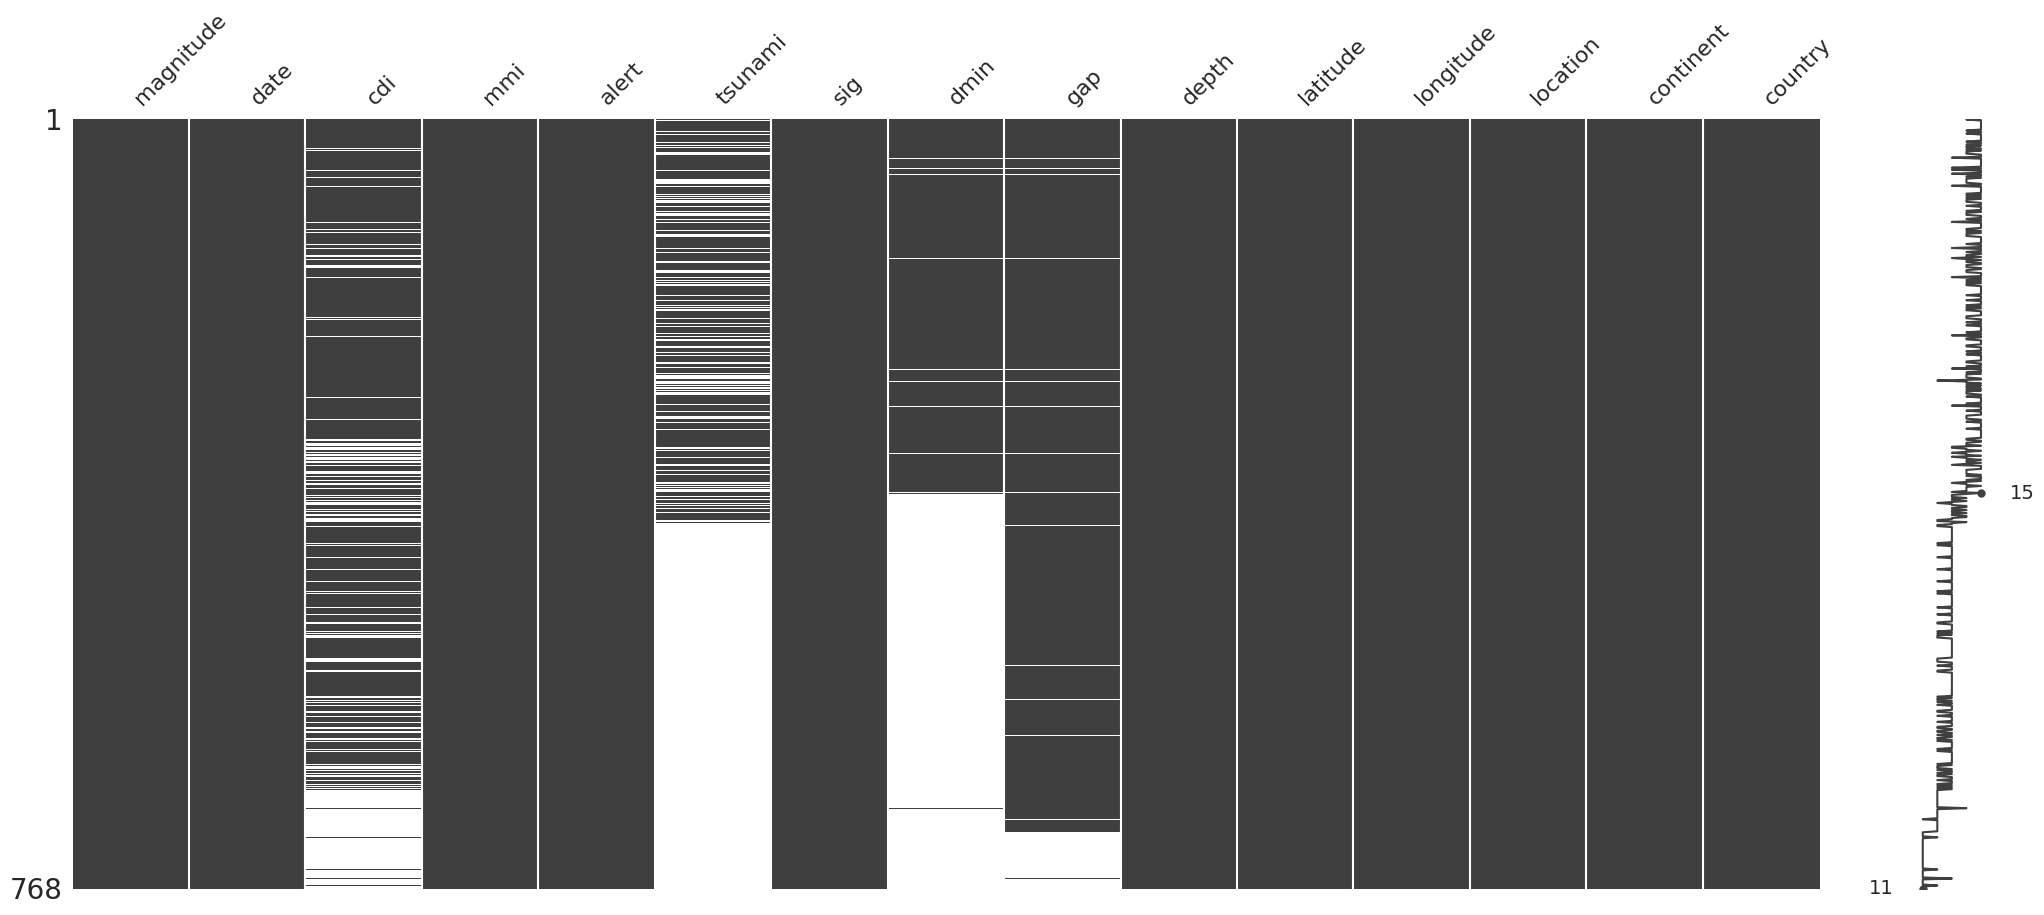

In [237]:
# exibindo visualização matricial da nulidade do dataset
ms.matrix(df_earth)

In [238]:
# verificando novamente nulls no dataset
df_earth.isnull().sum()

magnitude      0
date           0
cdi          207
mmi            0
alert          0
tsunami      475
sig            0
dmin         402
gap           70
depth          0
latitude       0
longitude      0
location       0
continent      0
country        0
dtype: int64

<Axes: >

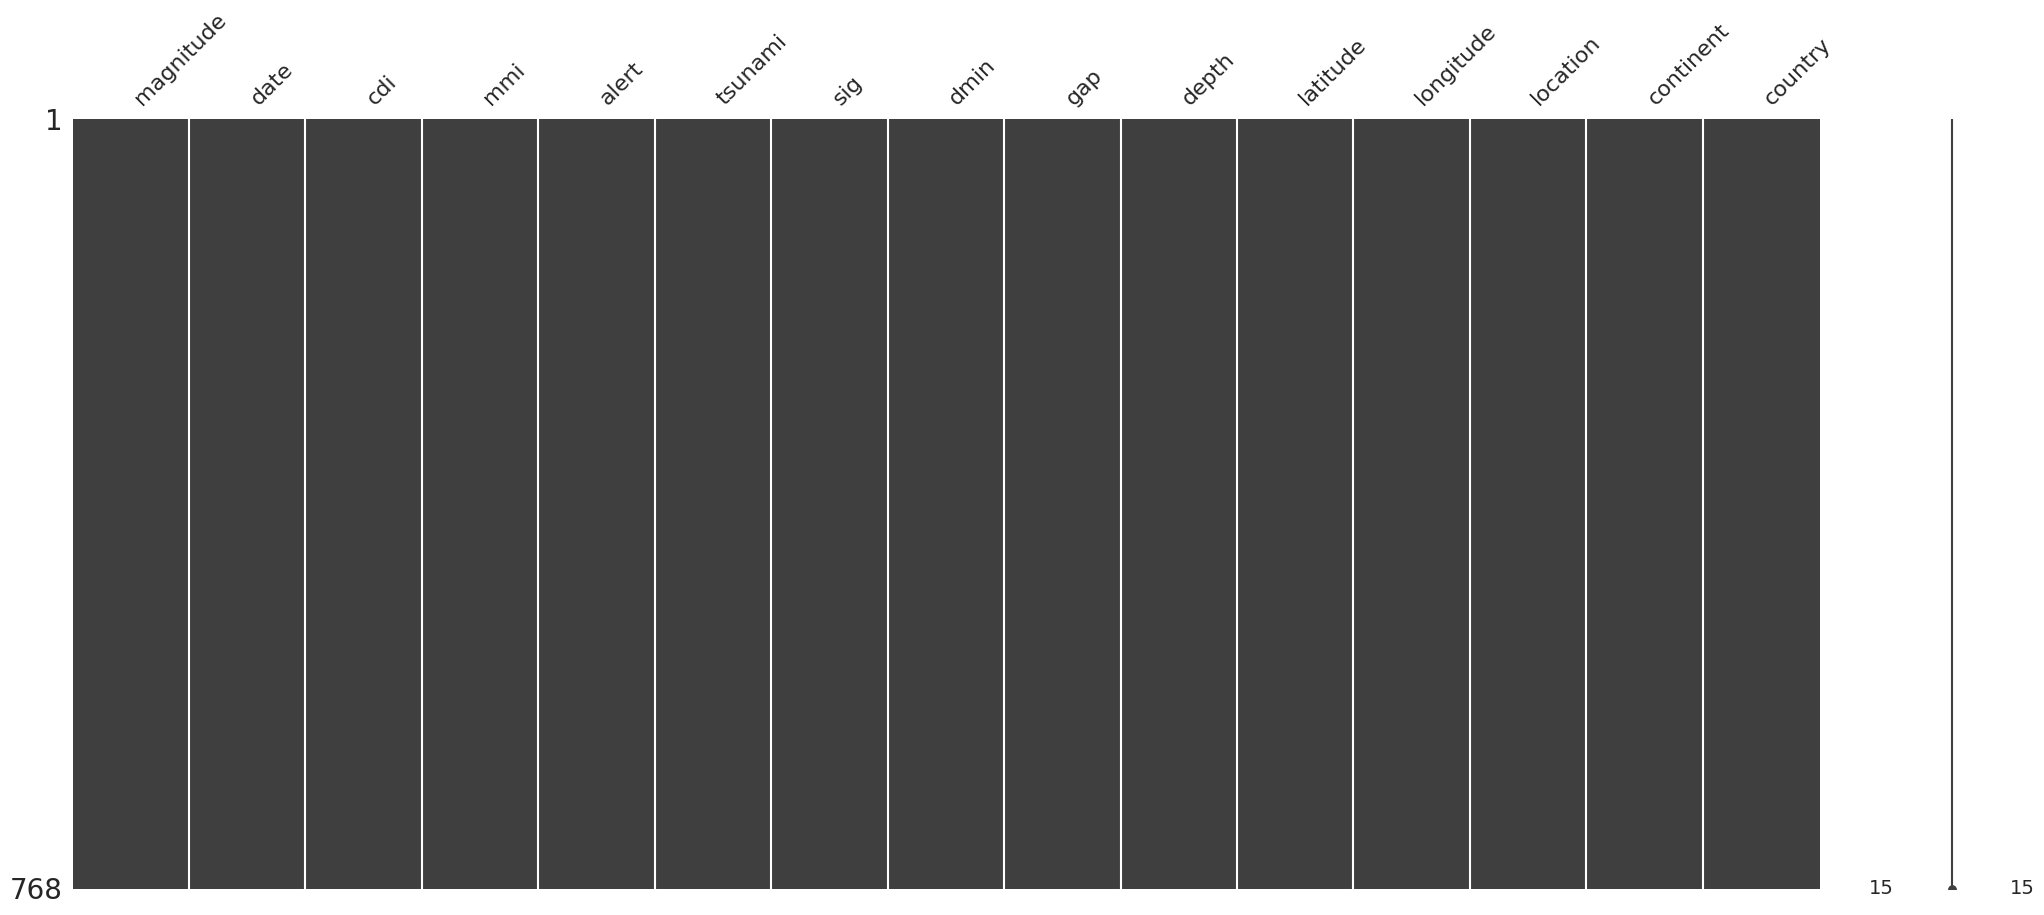

In [239]:
# substituindo os NaN de 'gap', 'tsunami' e 'depth_group' por 0 - voltando aos valores originais destas colunas
df_earth['gap'].fillna(0, inplace=True)
df_earth['tsunami'].fillna(0, inplace=True)

# substituindo os NaN de 'cdi'e 'dmin' pela mediana da coluna
df_earth['cdi'].fillna(df_earth['cdi'].median(), inplace=True)
df_earth['dmin'].fillna(df_earth['dmin'].median(), inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(df_earth)

In [240]:
# exibindo as últimas linhas para ver os valores atualizados
df_earth.tail(10)

,magnitude,date,cdi,mmi,alert,tsunami,sig,dmin,gap,depth,latitude,longitude,location,continent,country
764,7.1,3/7/2020,6.0,7,green,0.0,776,1.9915,0.0,35.0,1.2710,126.249,"Ternate, Indonesia",Asia,Indonesia
765,7.4,15/05/2020,6.0,6,green,0.0,842,1.9915,0.0,36.0,-4.6800,102.562,"Bengkulu, Indonesia",Asia,Indonesia
766,6.6,12/5/2020,6.0,8,green,0.0,670,1.9915,0.0,10.0,13.6710,-88.938,"Cojutepeque, El Salvador",Central America,El Salvador
767,7.7,6/5/2020,6.0,9,green,0.0,912,1.9915,0.0,16.0,23.4190,70.232,"Bhach?u, India",Asia,India
768,6.9,2/5/2020,6.0,6,green,0.0,732,1.9915,0.0,28.0,-4.0220,101.776,"Bengkulu, Indonesia",Asia,Indonesia
769,7.7,31/03/2020,6.0,8,green,0.0,912,1.9915,0.0,60.0,13.0490,-88.660,"Puerto El Triunfo, El Salvador",Central America,El Salvador
770,6.9,25/03/2020,5.0,7,green,0.0,745,1.9915,0.0,36.4,56.7744,-153.281,"Old Harbor, Alaska",North America,United States of America
771,7.1,13/02/2020,6.0,7,green,0.0,776,1.9915,0.0,103.0,-14.9280,167.170,"Port-Olry, Vanuatu",Oceania,Vanuatu
772,6.8,28/01/2020,6.0,5,green,0.0,711,1.9915,0.0,33.0,6.6310,126.899,"Mindanao, Philippines",Asia,Philippines
773,7.5,24/01/2020,6.0,7,green,0.0,865,1.9915,0.0,33.0,6.8980,126.579,"Lukatan, Philippines",Asia,Philippines


### Inserir os gráficos de correlação e heatmap para o dataser df_earth!!!

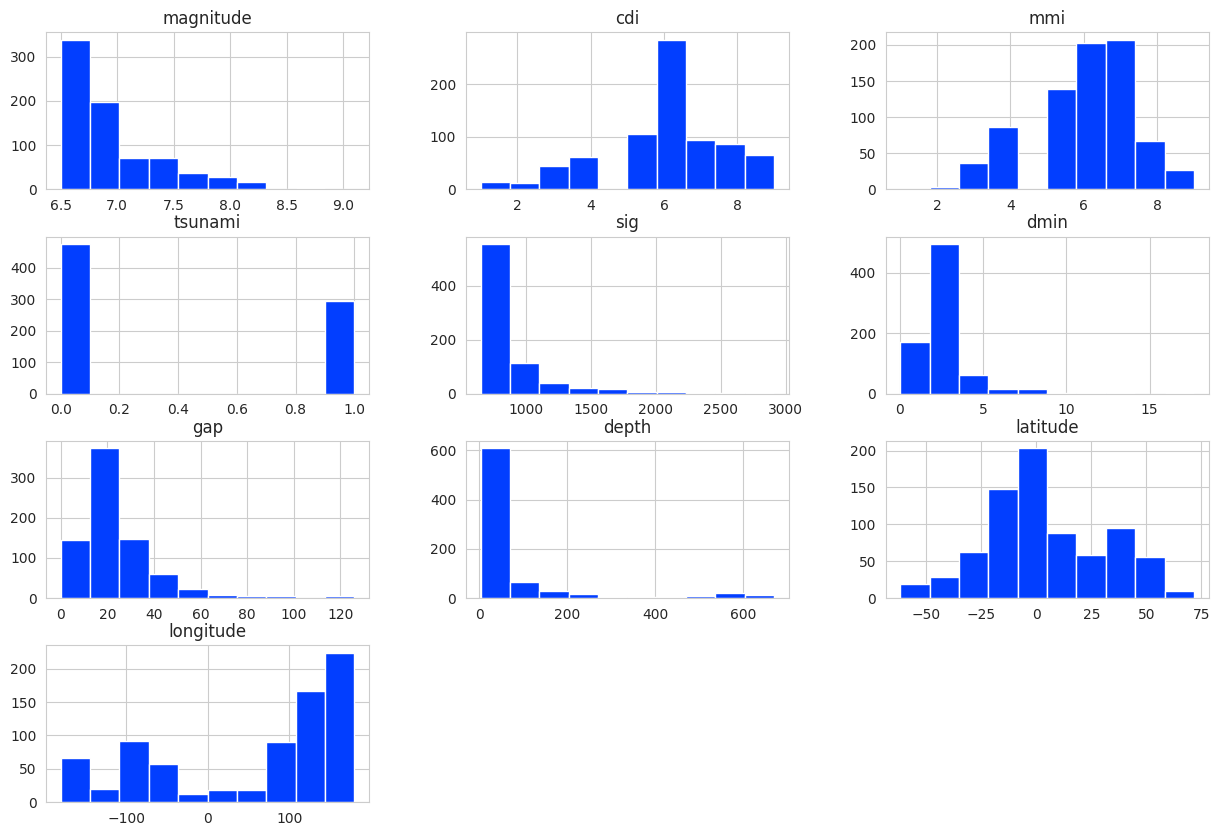

In [241]:
# Histograma
df_earth.hist(figsize = (15,10))
plt.show()

<ipython-input-242-4c1a6d6c8dce>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_earth.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);


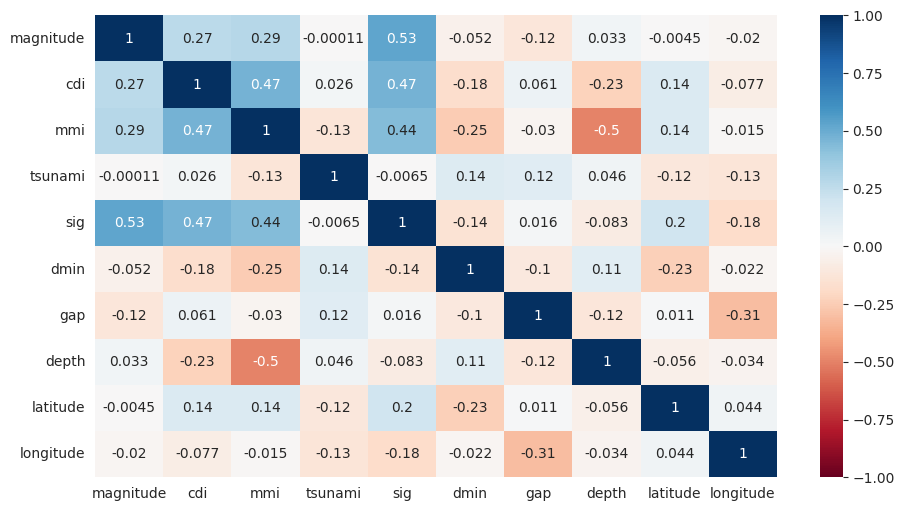

In [242]:
# gráfico de correlação com Seaborn
plt.figure(figsize = (11,6))
sns.heatmap(df_earth.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

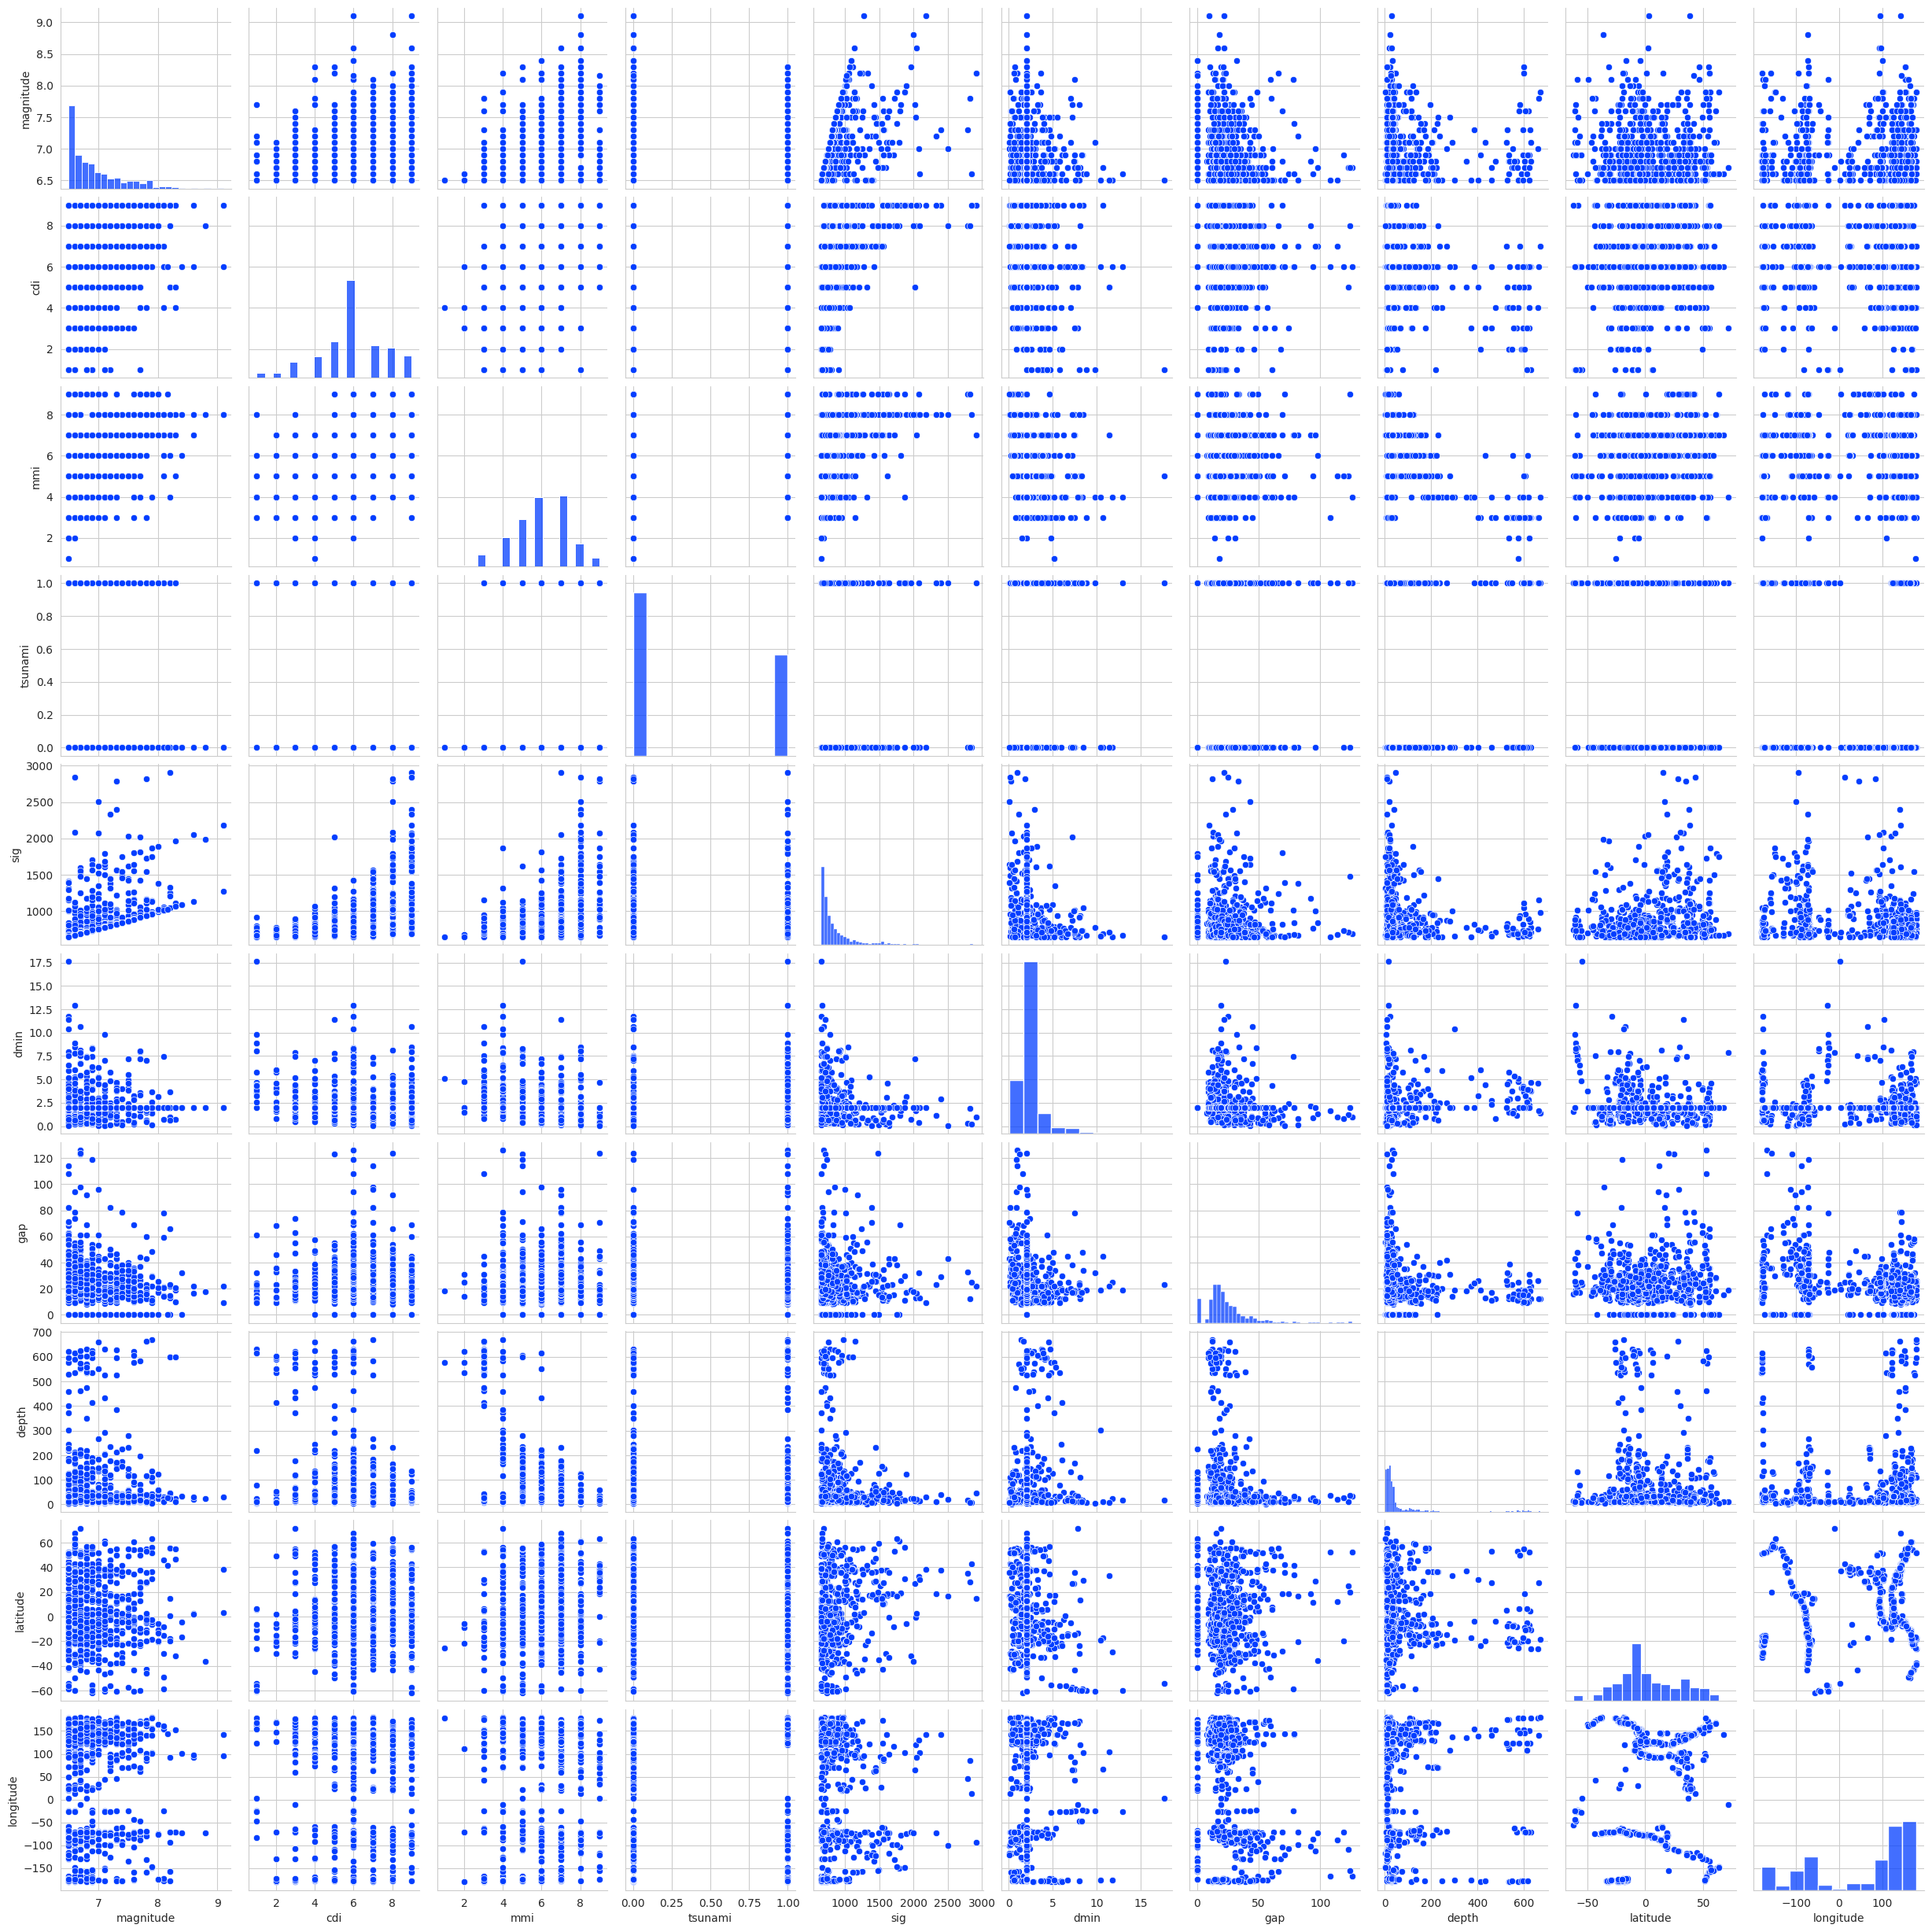

In [243]:
# pair plot 1 com Seaborn
sns.pairplot(df_earth)

In [244]:
# pair plot 2 com Seaborn
sns.pairplot(df_earth, hue = "alert");

Output hidden; open in https://colab.research.google.com to view.

### vou fazer o tratamento para a coluna data, assim poderei trabalhar com os dados em ano.

In [245]:
# criação de um novo dataframe para fazer o tratamento da data
df_earth1 = pd.DataFrame(df_earth)

In [246]:
df_earth1.tail()

,magnitude,date,cdi,mmi,alert,tsunami,sig,dmin,gap,depth,latitude,longitude,location,continent,country
769,7.7,31/03/2020,6.0,8,green,0.0,912,1.9915,0.0,60.0,13.0490,-88.660,"Puerto El Triunfo, El Salvador",Central America,El Salvador
770,6.9,25/03/2020,5.0,7,green,0.0,745,1.9915,0.0,36.4,56.7744,-153.281,"Old Harbor, Alaska",North America,United States of America
771,7.1,13/02/2020,6.0,7,green,0.0,776,1.9915,0.0,103.0,-14.9280,167.170,"Port-Olry, Vanuatu",Oceania,Vanuatu
772,6.8,28/01/2020,6.0,5,green,0.0,711,1.9915,0.0,33.0,6.6310,126.899,"Mindanao, Philippines",Asia,Philippines
773,7.5,24/01/2020,6.0,7,green,0.0,865,1.9915,0.0,33.0,6.8980,126.579,"Lukatan, Philippines",Asia,Philippines


In [247]:
# Converte a coluna de date para o formato datetime
df_earth1['date'] = pd.to_datetime(df_earth1['date'], format='%d/%m/%Y')

In [248]:
# Cria uma nova coluna no DataFrame separando o ano do dia/mês.
df_earth1['year'] = df_earth1['date'].dt.year


In [249]:
df_earth1.tail()

,magnitude,date,cdi,mmi,alert,tsunami,sig,dmin,gap,depth,latitude,longitude,location,continent,country,year
769,7.7,2020-03-31,6.0,8,green,0.0,912,1.9915,0.0,60.0,13.0490,-88.660,"Puerto El Triunfo, El Salvador",Central America,El Salvador,2020
770,6.9,2020-03-25,5.0,7,green,0.0,745,1.9915,0.0,36.4,56.7744,-153.281,"Old Harbor, Alaska",North America,United States of America,2020
771,7.1,2020-02-13,6.0,7,green,0.0,776,1.9915,0.0,103.0,-14.9280,167.170,"Port-Olry, Vanuatu",Oceania,Vanuatu,2020
772,6.8,2020-01-28,6.0,5,green,0.0,711,1.9915,0.0,33.0,6.6310,126.899,"Mindanao, Philippines",Asia,Philippines,2020
773,7.5,2020-01-24,6.0,7,green,0.0,865,1.9915,0.0,33.0,6.8980,126.579,"Lukatan, Philippines",Asia,Philippines,2020


In [250]:
# Agrupa os dados por ano e calcula o número de terremotos em cada ano
df_earth1 = df_earth1.groupby('year')['magnitude'].count().reset_index()

In [251]:
df_earth1.tail()

,year,magnitude
14,2018,42
15,2019,33
16,2020,50
17,2021,84
18,2022,70


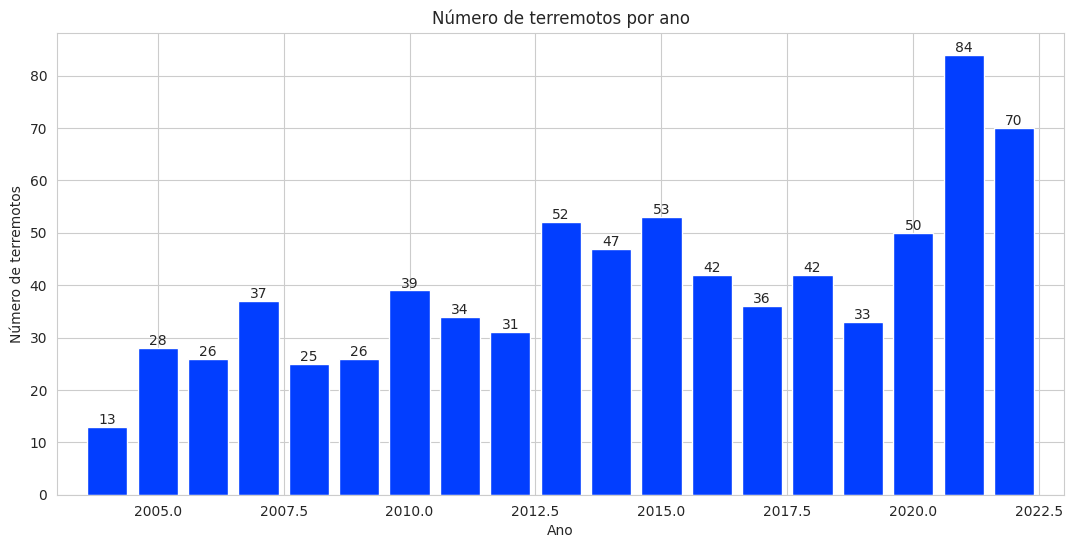

In [252]:
# Cria um gráfico de barras no pyplot
fig, ax = plt.subplots(figsize = (13,6))
plt.bar(df_earth1['year'], df_earth1['magnitude'])

#Adiciona os valores sobre as barras
ax.bar_label(ax.containers[0], fmt="%d")

# Adiciona títulos e rótulos aos eixos
plt.title('Número de terremotos por ano')
plt.xlabel('Ano')
plt.ylabel('Número de terremotos')

# aumentando o tamanho do eixo x
plt.xlim(2003, 2023)

# Mostra o gráfico
plt.show()

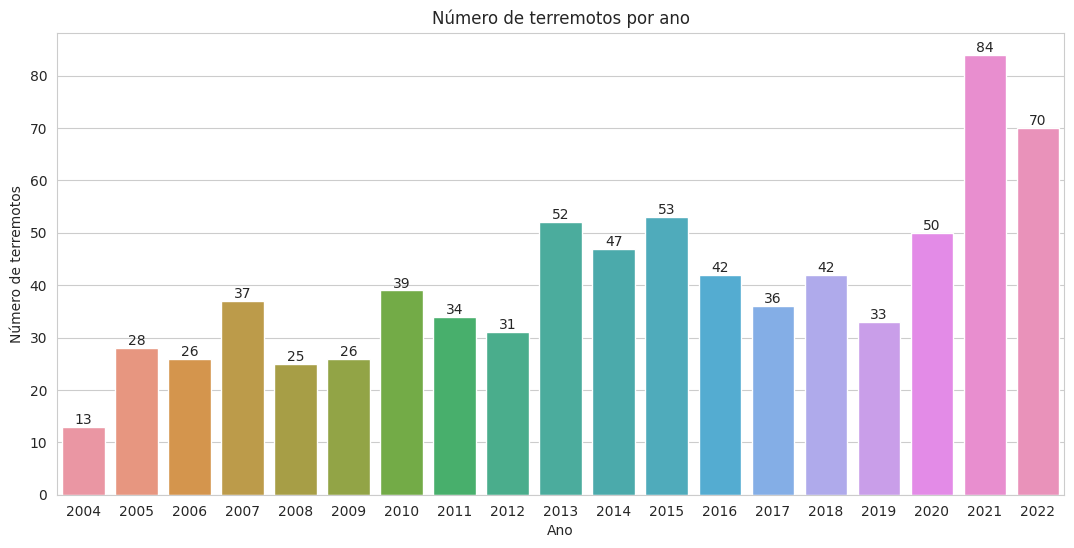

In [253]:

# Cria um gráfico de barras usando Seaborn
fig, ax = plt.subplots(figsize = (13,6))
sns.barplot(data=df_earth1, x='year', y='magnitude')

#Adiciona os valores sobre as barras
ax.bar_label(ax.containers[0], fmt="%d")

# Adiciona títulos e rótulos aos eixos
plt.title('Número de terremotos por ano')
plt.xlabel('Ano')
plt.ylabel('Número de terremotos')

# Mostra o gráfico
plt.show()

In [254]:
# criação de um novo dataframe para fazer o tratamento da profundidade com a magnitude
df_earth2 = pd.DataFrame(df_earth)

In [255]:
# criação de um dataframe somente com as colunas magnitue e profundidade
df_earth2 = pd.DataFrame(df_earth2, columns=['magnitude', 'depth'])

In [256]:
correlation = df_earth2.corr()
print(correlation)

           magnitude     depth
magnitude   1.000000  0.033061
depth       0.033061  1.000000


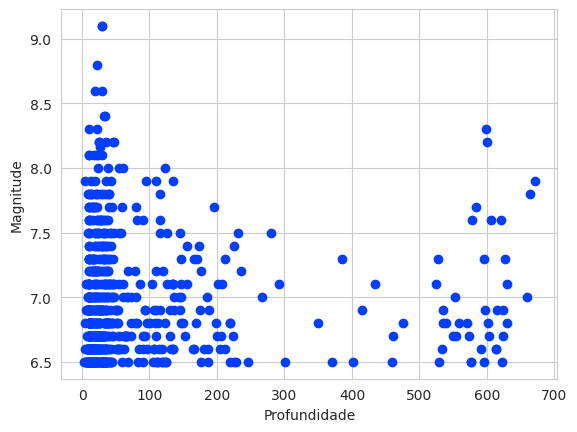

In [257]:
# gerando um gráfico de dispersão
plt.scatter(df_earth2['depth'], df_earth2['magnitude'])
plt.xlabel('Profundidade')
plt.ylabel('Magnitude')
plt.show()

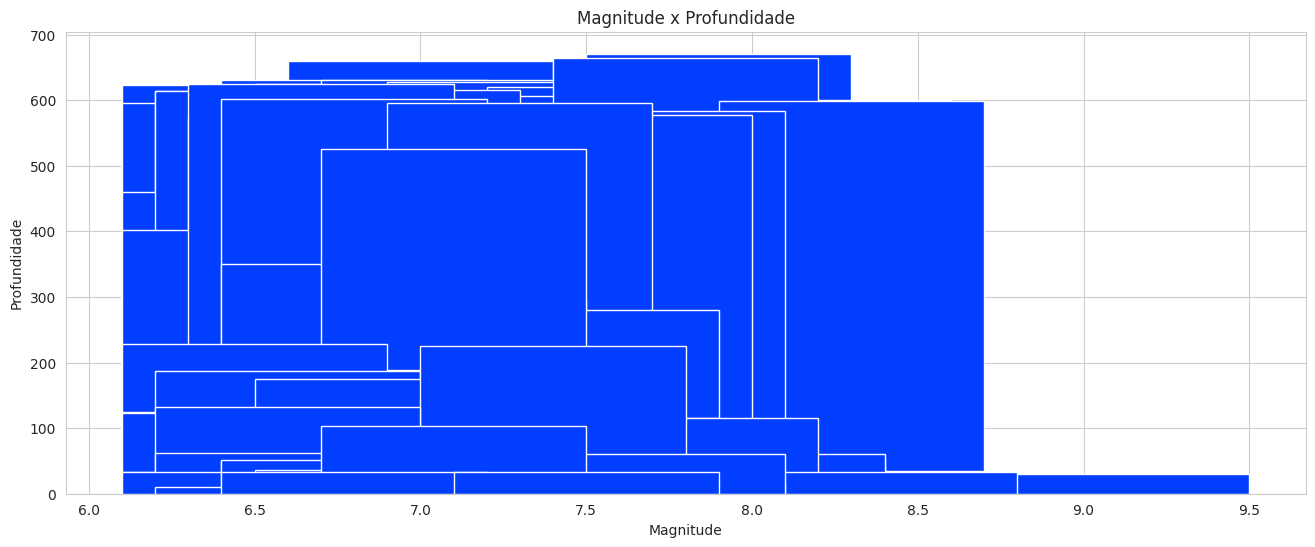

In [258]:
# Cria um gráfico de barras no pyplot
fig, ax = plt.subplots(figsize = (16,6))
plt.bar(df_earth2['magnitude'], df_earth2['depth'])

# Adiciona títulos e rótulos aos eixos
plt.title('Magnitude x Profundidade')
plt.xlabel('Magnitude')
plt.ylabel('Profundidade')

# Mostra o gráfico
plt.show()

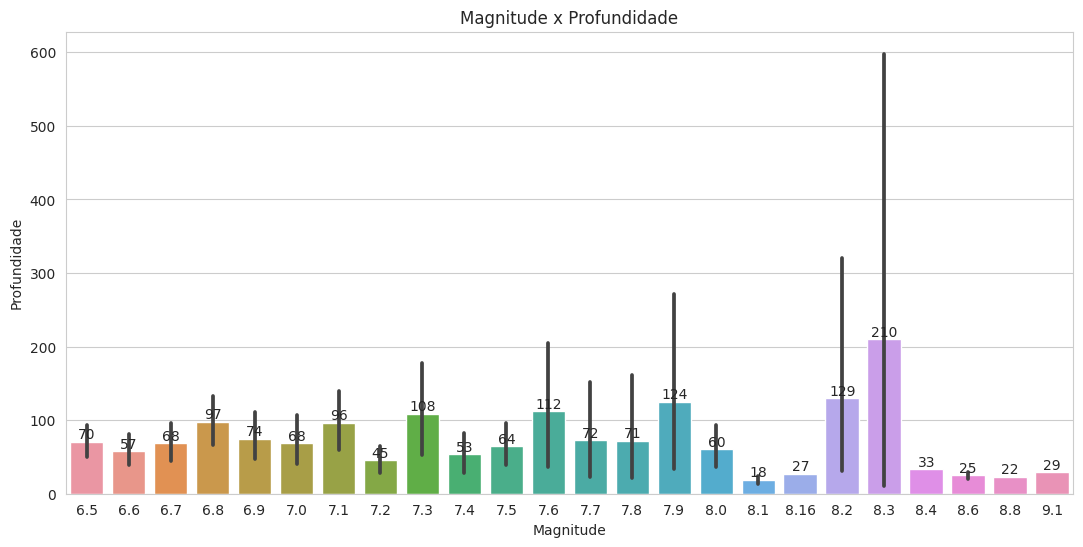

In [259]:
# Cria um gráfico de barras usando Seaborn
fig, ax = plt.subplots(figsize = (13,6))
sns.barplot(data=df_earth2, x='magnitude', y='depth')

#Adiciona os valores sobre as barras
ax.bar_label(ax.containers[0], fmt="%d")

# Adiciona títulos e rótulos aos eixos
plt.title('Magnitude x Profundidade')
plt.xlabel('Magnitude')
plt.ylabel('Profundidade')

# Mostra o gráfico
plt.show()

In [260]:
# selecionando linhas segundo um critério
# Possível de remoção do dataset
df_earth2[df_earth2['depth'] > 500].tail(10)

,magnitude,depth
312,6.6,614.00
323,6.9,615.42
367,6.7,573.00
384,6.7,624.00
385,8.3,598.10
387,6.8,602.20
424,7.7,583.20
486,7.6,578.00
517,7.3,595.00
656,7.1,525.00


### Fazer tratamento da profundidade por classes (0-100, 100 - 300, > 300)

In [261]:
# criação de um novo dataframe para fazer o tratamento da profundidade por classe
df_earth3 = pd.DataFrame(df_earth)

In [262]:
# Crie uma nova coluna no DataFrame chamada 'depth_group'
# e atribua valores de acordo com a profundidade
df_earth3['depth_group'] = pd.cut(df_earth3['depth'], bins=[0, 10, 20, 30, 40, 50, 100, 300, 699], labels=['0-10m', '10-20m', '20-30m', '30-40m', '40-50m', '50-100m', '100-300m', '300-699m'])

# Visualize a contagem de terremotos em cada grupo
print(df_earth3['depth_group'].value_counts())

10-20m      165
20-30m      145
0-10m       124
30-40m      106
100-300m     89
50-100m      52
300-699m     49
40-50m       38
Name: depth_group, dtype: int64


In [263]:
df_earth3.head(10)

,magnitude,date,cdi,mmi,alert,tsunami,sig,dmin,gap,depth,latitude,longitude,location,continent,country,year,depth_group
0,7.0,2022-11-22,8.0,7,green,1.0,768,0.509,17.0,14.000,-9.7963,159.5960,"Malango, Solomon Islands",Oceania,Solomon Islands,2022,10-20m
1,6.9,2022-11-18,4.0,4,green,0.0,735,2.229,34.0,25.000,-4.9559,100.7380,"Bengkulu, Indonesia",Asia,Indonesia,2022,20-30m
2,7.3,2022-11-11,5.0,5,green,1.0,833,1.865,21.0,37.000,-19.2918,-172.1290,"Neiafu, Tonga",Oceania,Tonga,2022,30-40m
3,7.0,2022-11-09,4.0,3,green,1.0,755,4.578,26.0,660.000,-26.0442,178.3810,the Fiji Islands,Oceania,Fiji,2022,300-699m
4,6.8,2022-11-09,1.0,3,green,1.0,711,4.678,22.0,630.379,-25.9678,178.3630,the Fiji Islands,Oceania,Fiji,2022,300-699m
5,6.7,2022-10-20,7.0,6,green,1.0,797,1.151,37.0,20.000,7.6712,-82.3396,"Boca Chica, Panama",Central America,Panama,2022,10-20m
6,6.8,2022-09-22,8.0,7,yellow,1.0,1179,2.137,92.0,20.000,18.3300,-102.9130,"Aguililla, Mexico",North America,Mexico,2022,10-20m
7,7.6,2022-09-19,9.0,8,yellow,1.0,1799,1.153,69.0,26.943,18.3667,-103.2520,"Aguililla, Mexico",North America,Mexico,2022,20-30m
8,6.9,2022-09-18,9.0,9,yellow,1.0,887,0.401,34.0,10.000,23.1444,121.3070,"Yujing, Taiwan",Asia,Taiwan,2022,0-10m
9,6.5,2022-09-17,7.0,7,green,1.0,756,0.430,54.0,10.000,23.0290,121.3480,"Lugu, Taiwan",Asia,Taiwan,2022,0-10m


In [264]:
# Agrupa os dados por classe de profundidade e calcula o número de terremotos em cada classe
df_earth3 = df_earth3.groupby('depth_group')['magnitude'].count().reset_index()

In [265]:
df_earth3.tail()

,depth_group,magnitude
3,30-40m,106
4,40-50m,38
5,50-100m,52
6,100-300m,89
7,300-699m,49


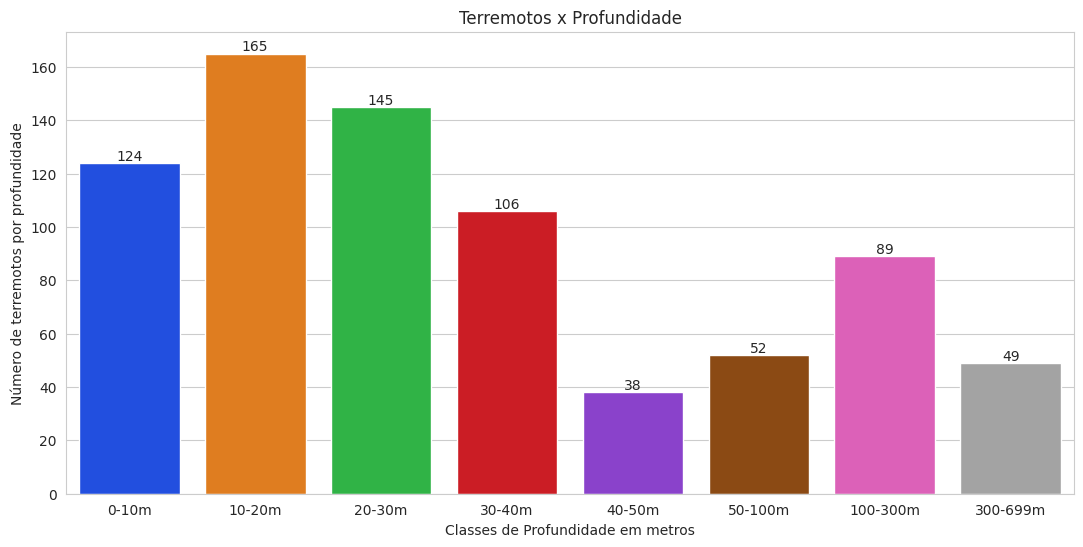

In [266]:
# Cria um gráfico de barras usando Seaborn
fig, ax = plt.subplots(figsize = (13,6))
sns.barplot(data=df_earth3, x='depth_group', y='magnitude')

# Adiciona os valores sobre as barras
ax.bar_label(ax.containers[0], fmt="%d")

# Adiciona títulos e rótulos aos eixos
plt.title('Terremotos x Profundidade')
plt.xlabel('Classes de Profundidade em metros')
plt.ylabel('Número de terremotos por profundidade')

# Mostra o gráfico
plt.show()

### começar a fazer os gráficos para poder analisar

### Pegando a cola do gpt

In [267]:
# criação de um novo dataframe para fazer a correlação de terremotos por ano e continente
df_earth4 = pd.DataFrame(df_earth)

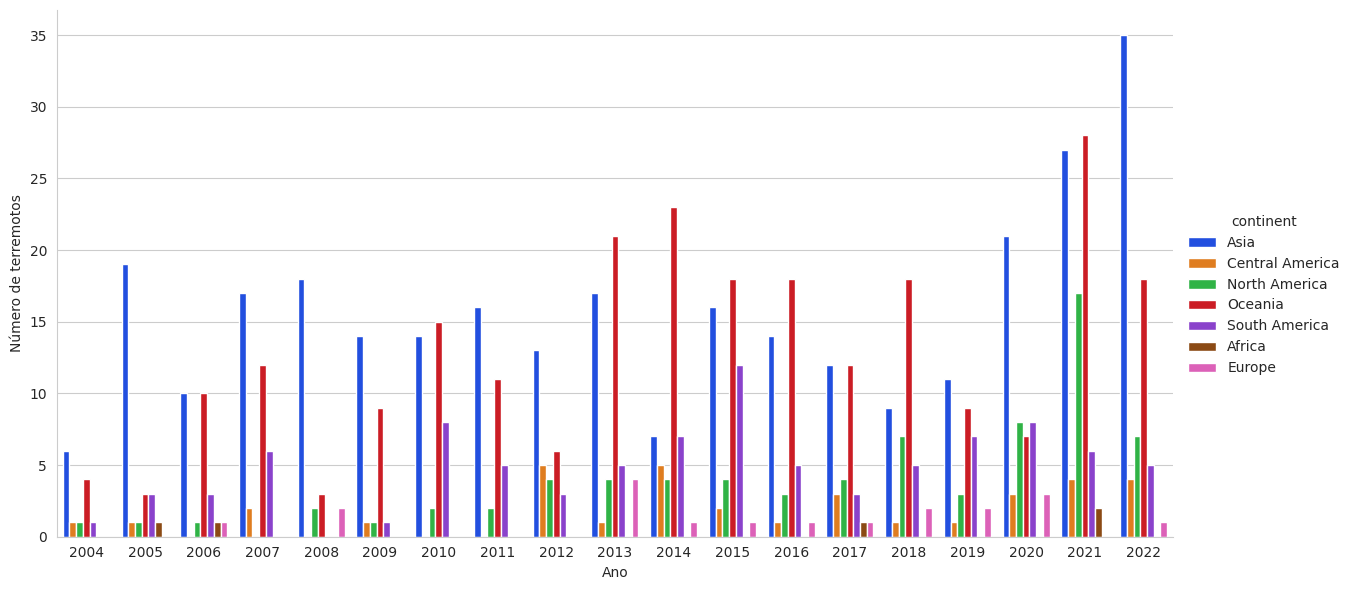

In [268]:
# Agrupa os terremotos por ano e por continente e conta o número de terremotos em cada grupo
df_earth4 = df_earth4.groupby(['year', 'continent']).size().reset_index(name='count')

# Cria um gráfico de barras empilhadas para o número de terremotos por ano em cada continente
sns.set_palette('bright')
sns.set_style('whitegrid')
g = sns.catplot(x='year', y='count', hue='continent', data=df_earth4, kind='bar', height=6, aspect=2)

g.set_axis_labels('Ano', 'Número de terremotos')
plt.show()

## melhorar esse gráfico e tentar fazer um com barra empilhada

In [269]:
# Visualize a contagem de terremotos em cada contimente
print(df_earth['continent'].value_counts())

Asia               296
Oceania            245
South America       93
North America       75
Central America     35
Europe              19
Africa               5
Name: continent, dtype: int64


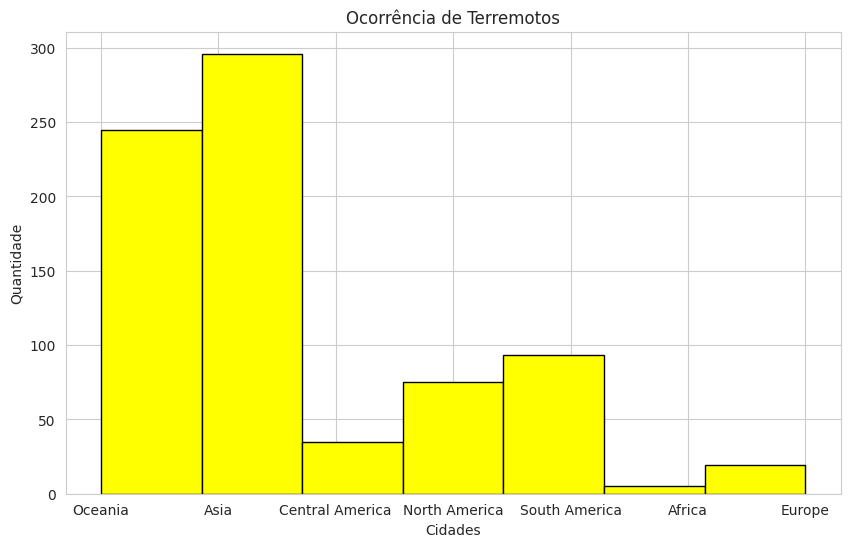

In [270]:
# plotando o histograma
### posso melhorar esse histograma colocando mais dados no gráfico (procurar uma forma de colocar as barras em ordem decrescente )
fig = plt.figure(figsize=(10, 6))
plt.hist(df_earth['continent'], bins=7, edgecolor='black', color='yellow')

# incluindo título do gráfico e legenda
plt.title('Ocorrência de Terremotos')
plt.ylabel('Quantidade')
plt.xlabel('Cidades');

In [271]:
# criação de um novo dataframe para fazer a correlação de terremotos por ano e continente
df_earth5 = pd.DataFrame(df_earth)

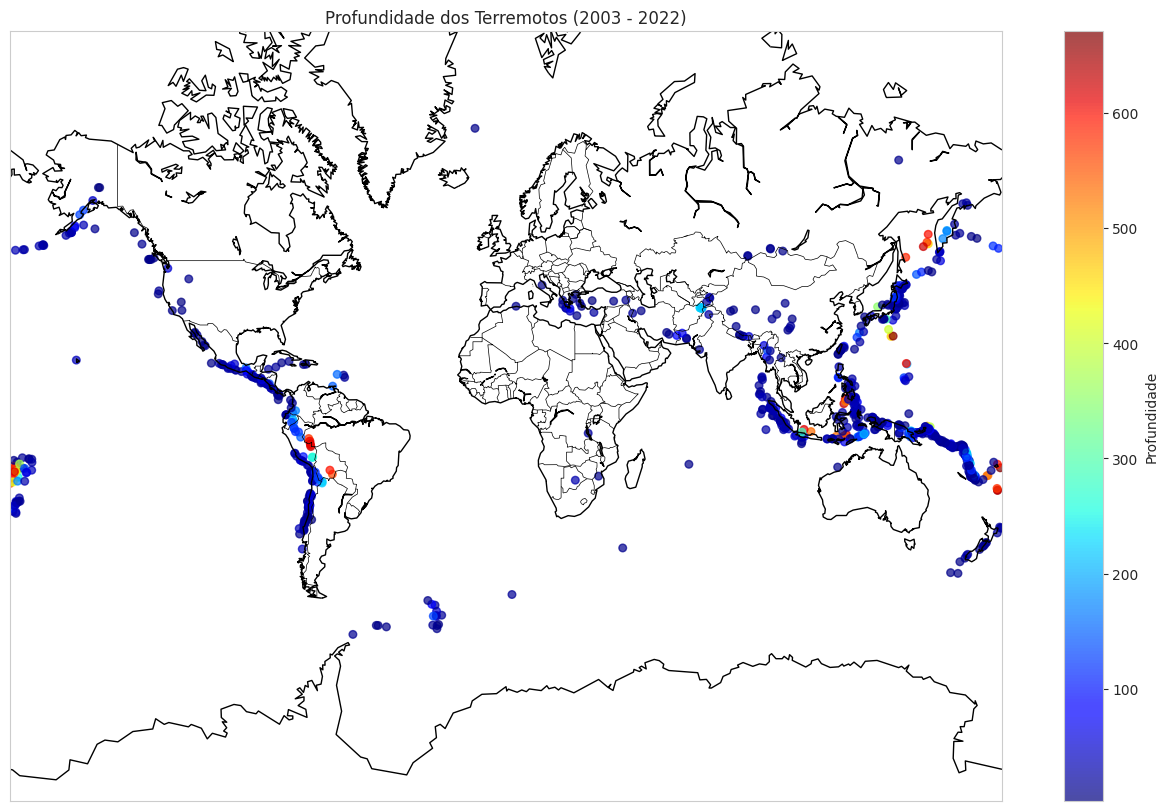

In [272]:
## Mapa que mostra a profundidade dos terremotos do dataset
# cria um mapa usando o Basemap
fig = plt.figure(figsize=(16, 10))
map = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80,
              llcrnrlon=-180, urcrnrlon=180, lat_ts=20, resolution='c')

# desenha a costa e as fronteiras dos países
map.drawcoastlines()
map.drawcountries()

# converte as coordenadas de latitude e longitude em coordenadas de mapa
x, y = map(list(df_earth5['longitude']), list(df_earth5['latitude']))

# cria um mapa de calor da profundidade dos terremotos
plt.scatter(x, y, c=df_earth5['depth'], s=30, cmap='jet', alpha=0.7)

# adiciona um título e uma barra de cores à figura
plt.colorbar(label='Profundidade')
plt.title('Profundidade dos Terremotos (2003 - 2022)')

# mostra a figura
plt.show()

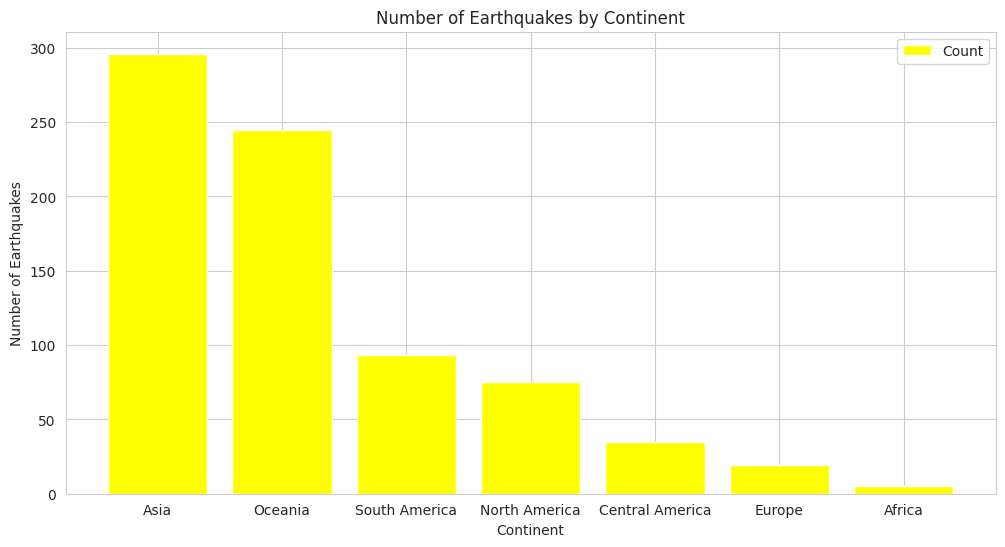

In [273]:
# agrupe os dados por continente e conte o número de terremotos em cada grupo
df_earth5 = df_earth5.groupby('continent').size().reset_index(name='Count')

# ordene os dados pelo número de terremotos em ordem decrescente
df_earth5 = df_earth5.sort_values(by='Count', ascending=False)

# crie um gráfico de barras dos dados
fig = plt.figure(figsize=(12, 6))
plt.bar(df_earth5['continent'], df_earth5['Count'], color='yellow')

# adicione um título e rótulos de eixo
plt.title('Number of Earthquakes by Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Earthquakes')

# adicione uma legenda
plt.legend(['Count'])

# exiba o gráfico
plt.show()

### Relacionando terremotos por cidades.

In [274]:
# criação de um novo dataframe para fazer a correlação de terremotos por cidades.
df_earth6 = pd.DataFrame(df_earth)

In [275]:
# Visualização das 10 primeiras linhas do novo daframe
df_earth6.head(10)

,magnitude,date,cdi,mmi,alert,tsunami,sig,dmin,gap,depth,latitude,longitude,location,continent,country,year,depth_group
0,7.0,2022-11-22,8.0,7,green,1.0,768,0.509,17.0,14.000,-9.7963,159.5960,"Malango, Solomon Islands",Oceania,Solomon Islands,2022,10-20m
1,6.9,2022-11-18,4.0,4,green,0.0,735,2.229,34.0,25.000,-4.9559,100.7380,"Bengkulu, Indonesia",Asia,Indonesia,2022,20-30m
2,7.3,2022-11-11,5.0,5,green,1.0,833,1.865,21.0,37.000,-19.2918,-172.1290,"Neiafu, Tonga",Oceania,Tonga,2022,30-40m
3,7.0,2022-11-09,4.0,3,green,1.0,755,4.578,26.0,660.000,-26.0442,178.3810,the Fiji Islands,Oceania,Fiji,2022,300-699m
4,6.8,2022-11-09,1.0,3,green,1.0,711,4.678,22.0,630.379,-25.9678,178.3630,the Fiji Islands,Oceania,Fiji,2022,300-699m
5,6.7,2022-10-20,7.0,6,green,1.0,797,1.151,37.0,20.000,7.6712,-82.3396,"Boca Chica, Panama",Central America,Panama,2022,10-20m
6,6.8,2022-09-22,8.0,7,yellow,1.0,1179,2.137,92.0,20.000,18.3300,-102.9130,"Aguililla, Mexico",North America,Mexico,2022,10-20m
7,7.6,2022-09-19,9.0,8,yellow,1.0,1799,1.153,69.0,26.943,18.3667,-103.2520,"Aguililla, Mexico",North America,Mexico,2022,20-30m
8,6.9,2022-09-18,9.0,9,yellow,1.0,887,0.401,34.0,10.000,23.1444,121.3070,"Yujing, Taiwan",Asia,Taiwan,2022,0-10m
9,6.5,2022-09-17,7.0,7,green,1.0,756,0.430,54.0,10.000,23.0290,121.3480,"Lugu, Taiwan",Asia,Taiwan,2022,0-10m


In [276]:
# Verifica a distribuição das classes
df_earth6.groupby('country').size()

country
Afghanistan                                                    6
Algeria                                                        1
Antarctica                                                     6
Argentina                                                      2
Australia                                                      1
                                                              ..
United Kingdom of Great Britain and Northern Ireland (the)     6
United States of America                                      39
Vanuatu                                                       43
Venezuela                                                      1
Wallis and Futuna                                              3
Length: 63, dtype: int64

In [277]:
# Visualize a contagem de terremotos em cada contimente
print(df_earth6['country'].value_counts())

Indonesia           120
Japan                64
Papua New Guinea     64
Chile                49
Vanuatu              43
                   ... 
Jamaica               1
Mongolia              1
Mauritius             1
Cyprus                1
Guam                  1
Name: country, Length: 63, dtype: int64


In [278]:
# criando uma nova coluna no df_earth6 com os dados dos países da coluna 'location'
df_earth6['country1'] = df_earth6['location'].apply(lambda x: x.split(",")[-1].strip())


In [279]:
# Visualização das 10 primeiras linhas do novo daframe
df_earth6.head(10)

,magnitude,date,cdi,mmi,alert,tsunami,sig,dmin,gap,depth,latitude,longitude,location,continent,country,year,depth_group,country1
0,7.0,2022-11-22,8.0,7,green,1.0,768,0.509,17.0,14.000,-9.7963,159.5960,"Malango, Solomon Islands",Oceania,Solomon Islands,2022,10-20m,Solomon Islands
1,6.9,2022-11-18,4.0,4,green,0.0,735,2.229,34.0,25.000,-4.9559,100.7380,"Bengkulu, Indonesia",Asia,Indonesia,2022,20-30m,Indonesia
2,7.3,2022-11-11,5.0,5,green,1.0,833,1.865,21.0,37.000,-19.2918,-172.1290,"Neiafu, Tonga",Oceania,Tonga,2022,30-40m,Tonga
3,7.0,2022-11-09,4.0,3,green,1.0,755,4.578,26.0,660.000,-26.0442,178.3810,the Fiji Islands,Oceania,Fiji,2022,300-699m,the Fiji Islands
4,6.8,2022-11-09,1.0,3,green,1.0,711,4.678,22.0,630.379,-25.9678,178.3630,the Fiji Islands,Oceania,Fiji,2022,300-699m,the Fiji Islands
5,6.7,2022-10-20,7.0,6,green,1.0,797,1.151,37.0,20.000,7.6712,-82.3396,"Boca Chica, Panama",Central America,Panama,2022,10-20m,Panama
6,6.8,2022-09-22,8.0,7,yellow,1.0,1179,2.137,92.0,20.000,18.3300,-102.9130,"Aguililla, Mexico",North America,Mexico,2022,10-20m,Mexico
7,7.6,2022-09-19,9.0,8,yellow,1.0,1799,1.153,69.0,26.943,18.3667,-103.2520,"Aguililla, Mexico",North America,Mexico,2022,20-30m,Mexico
8,6.9,2022-09-18,9.0,9,yellow,1.0,887,0.401,34.0,10.000,23.1444,121.3070,"Yujing, Taiwan",Asia,Taiwan,2022,0-10m,Taiwan
9,6.5,2022-09-17,7.0,7,green,1.0,756,0.430,54.0,10.000,23.0290,121.3480,"Lugu, Taiwan",Asia,Taiwan,2022,0-10m,Taiwan


In [280]:
# criando um novo dataframe com a quantidades de terremotos por cidade
df_country_counts = df_earth6['country'].value_counts()


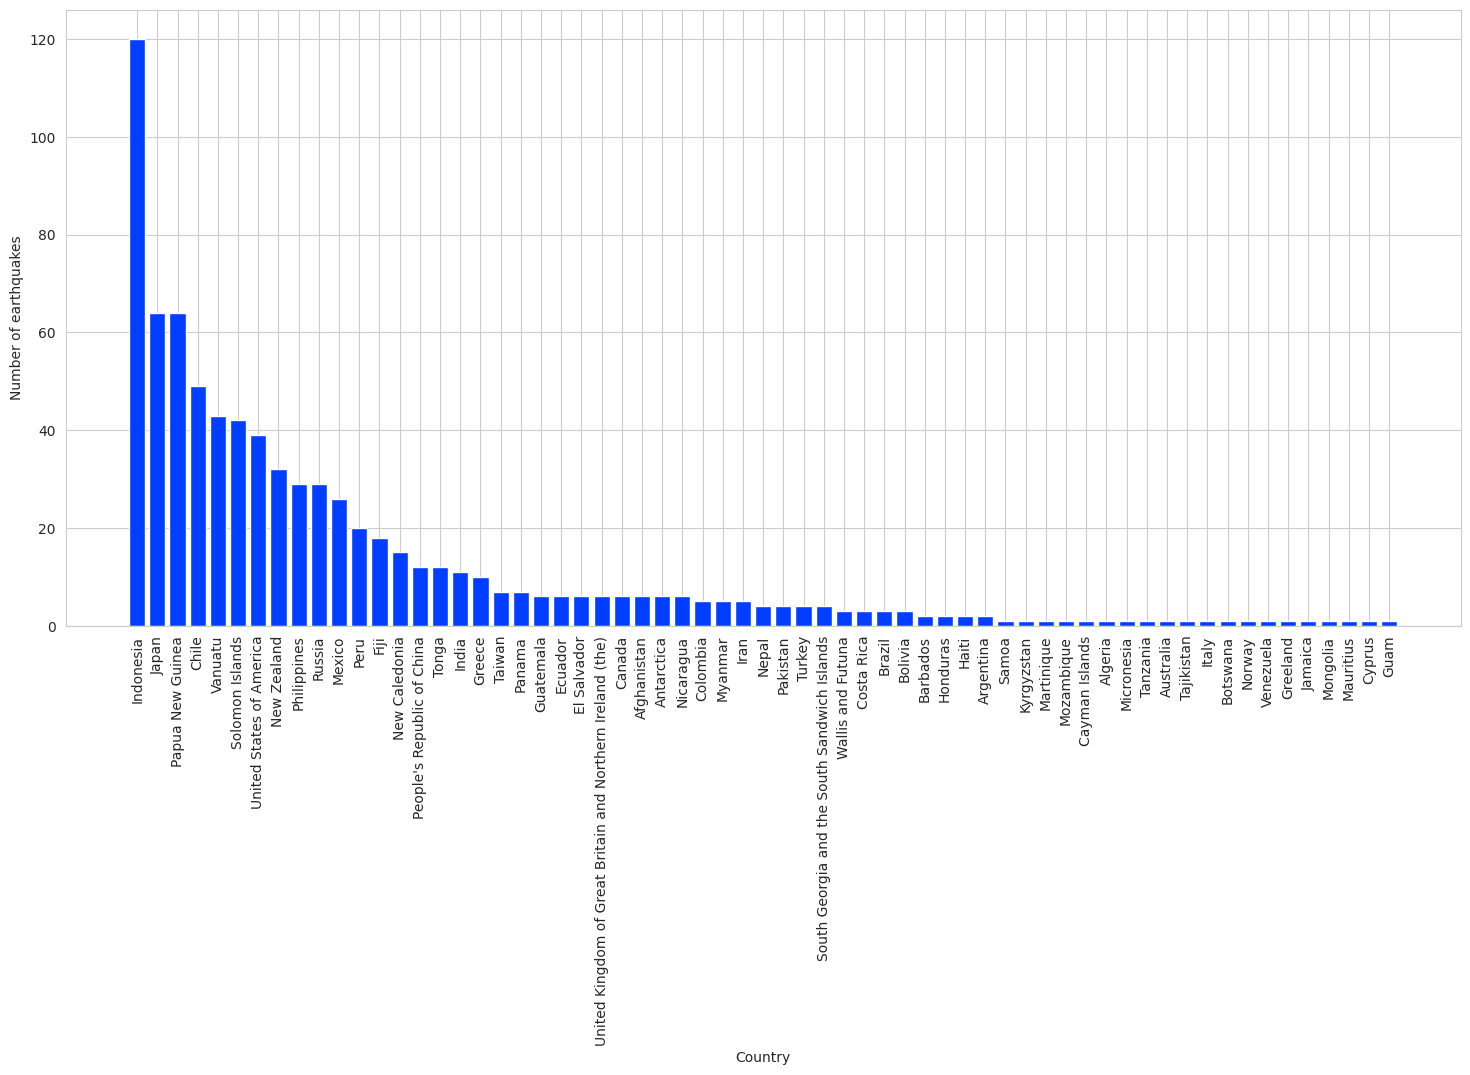

In [281]:
# gerando um gráfico de barras por ordem decrescente
fig = plt.figure(figsize=(18, 8))
plt.bar(df_country_counts.index, df_country_counts.values)
plt.xlabel('Country')
plt.ylabel('Number of earthquakes')
plt.xticks(rotation=90)
plt.show()

### nova tentativa de crair o mapa com bublleplot

In [282]:
# criação de um novo dataframe para fazer a correlação de terremotos por cidades.
df_earth7 = pd.DataFrame(df_earth)

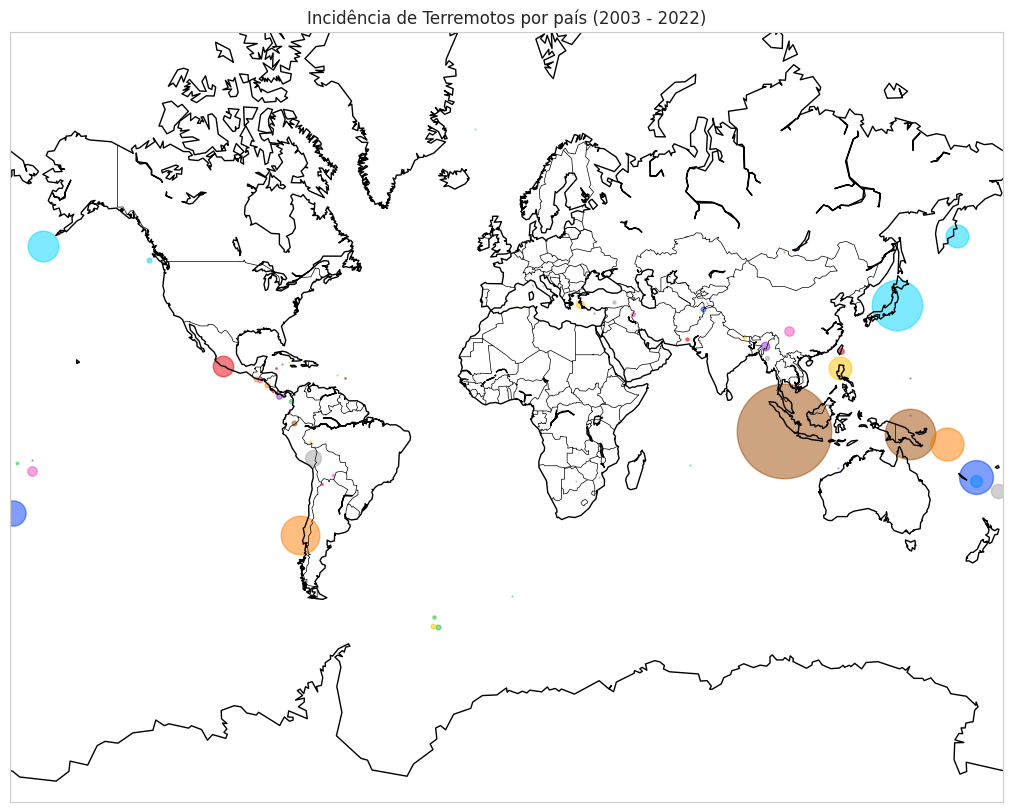

In [291]:
# agrupar por país e contar terremotos
df_count = df_earth7.groupby('country').size().reset_index(name='counts')

# carregar mapa
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(1, 1, 1)
map = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80,
              llcrnrlon=-180, urcrnrlon=180, lat_ts=20, resolution='c')

# converter coordenadas de lat/lon para x/y
x, y = map(df_earth7['longitude'].values, df_earth7['latitude'].values)

# desenhar mapa
map.drawcoastlines()
map.drawcountries()

# desenhar bolhas
scale_factor = 0.32  # ajustar tamanho das bolhas
for i, row in df_count.iterrows():
    count = row['counts']
    if count > 0:
        x_pt, y_pt = map(df_earth7[df_earth7['country'] == row['country']]['longitude'].values[0], 
                         df_earth7[df_earth7['country'] == row['country']]['latitude'].values[0])
        area = np.pi * (scale_factor * count) ** 2
        ax.scatter(x_pt, y_pt, s=area, alpha=0.5)

# adiciona um título
plt.title('Incidência de Terremotos por país (2003 - 2022)')

plt.show()

### Outros testes

In [284]:
# fazer gráficos de distribuição para saber onde usar a normalização e a padronização

In [285]:
## fazer o histograma

magnitude       Axes(0.125,0.712609;0.227941x0.167391)
cdi          Axes(0.398529,0.712609;0.227941x0.167391)
mmi          Axes(0.672059,0.712609;0.227941x0.167391)
tsunami         Axes(0.125,0.511739;0.227941x0.167391)
sig          Axes(0.398529,0.511739;0.227941x0.167391)
dmin         Axes(0.672059,0.511739;0.227941x0.167391)
gap              Axes(0.125,0.31087;0.227941x0.167391)
depth         Axes(0.398529,0.31087;0.227941x0.167391)
latitude      Axes(0.672059,0.31087;0.227941x0.167391)
longitude           Axes(0.125,0.11;0.227941x0.167391)
dtype: object

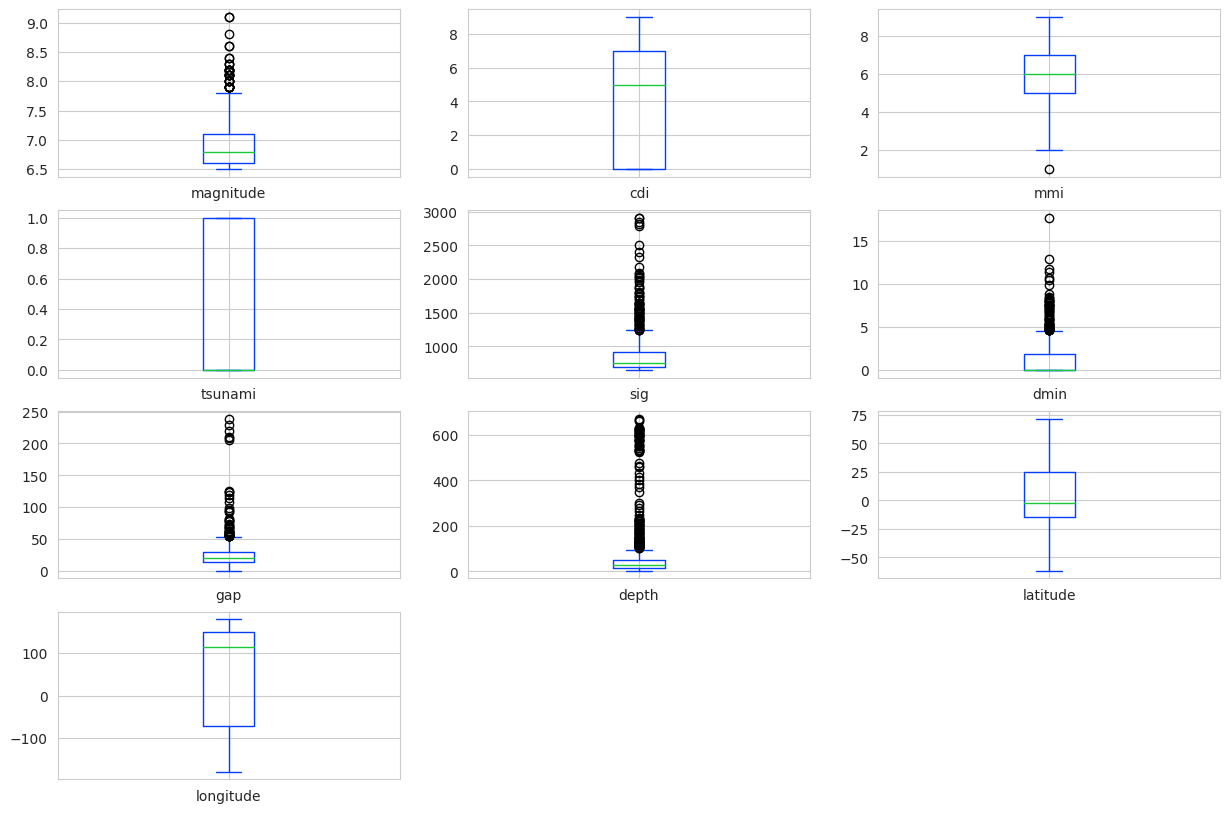

In [286]:
# Boxplot
earthquake.plot(kind = 'box', subplots = True, layout = (4,3), sharex = False, sharey = False, figsize = (15,10))

In [287]:
# após esse tratamento, fazer a normalização e/ou padronização dos dados que convem
# usar a lib scaler, com as funções MinMaxScaler paa normalização e StandertScale para padronização

In [288]:
# removendo as colunas 'title'
# earthquake.drop(['title', 'date', 'alert', 'time', 'latitude' , 'longitude', 'longitude', 'location', 'continent', 'country'], axis=1, inplace= True)
### comentei esse trecho acima pois tinha q ir vendo onde iria ocorrer erros para eliminar as colunas
earthquake.drop(['location'], axis=1, inplace= True)

In [289]:
# Separando os valores do dataset em componentes de input (X) e output (Y)
X = earthquake.values[:,0:7]
Y = earthquake.values[:,7]

In [290]:
# Normalizando os dados
rescaledX = MinMaxScaler().fit_transform(X)

# Exibindo os dados transformados
print("Dados Originais: \n\n", earthquake.values)
print("\nDados Normalizados): \n\n", rescaledX)

ValueError: ignored

In [ ]:
earthquake.drop(['tsunami'], axis=1).hist(figsize = (15,10))
plt.show()


In [ ]:
# Padronizando os dados
rescaledX = StandardScaler().fit_transform(X)

# Exibindo os dados transformados
print("Dados Originais: \n\n", earthquake.values)
print("\nDados Padronizados: \n\n", rescaledX)

In [ ]:
# Boxplot
earthquake.plot(kind = 'box', subplots = True, layout = (4,3), sharex = False, sharey = False, figsize = (15,10))

## Visualizações Unimodais

In [ ]:
# tentar montar um gráfico de pizza para o total de eventos por ano

In [ ]:
# tentar montar uma figura com o mapa mundi com a localização dos eventos
# gráfico como foi mostrado em um dashboard (aula de visualização)